In [1]:
import matplotlib.pyplot as plt
import shap
from chessplainer.wrapper_wdl import EngineWrapper, ChessExplainer
import chess
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')


In [2]:
PLOT_SIZE = (8, 4)
FIT_LIMIT_KWARGS = dict(time=5)
PREDICT_LIMIT_KWARGS = dict(time=0.1)
NSAMPLES = 10000
FOLDER = pathlib.Path("./paper_explanations")

# Self-blocking pawn

In [46]:
FILENAME = FOLDER / "bad_pawn"
FEN = "Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 w - - 0 1"

True


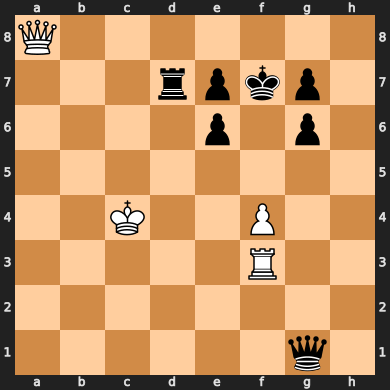

In [47]:
board = chess.Board(FEN)
print(board.turn)
board

In [48]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.031 0.969]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 19.5 s, sys: 830 ms, total: 20.3 s
Wall time: 5min 42s


.values =
array([[[-0.45612742,  0.45612742],
        [ 0.30088589, -0.30088589],
        [-0.15538227,  0.15538227],
        [-0.0278081 ,  0.0278081 ],
        [-0.0883651 ,  0.0883651 ],
        [-0.30663827,  0.30663827],
        [-0.07072581,  0.07072581],
        [-0.07958507,  0.07958507],
        [ 0.41474614, -0.41474614]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

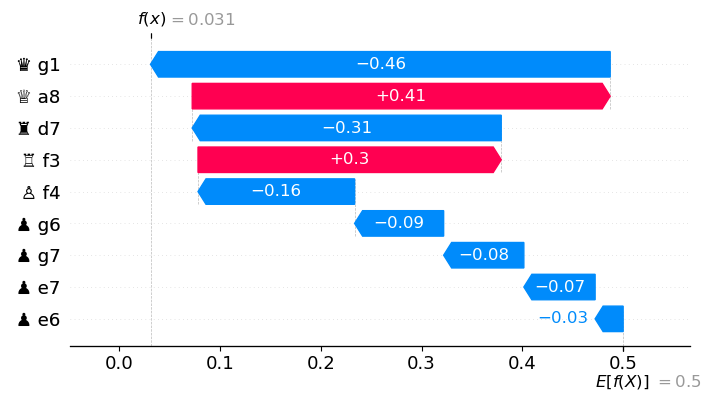

In [49]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


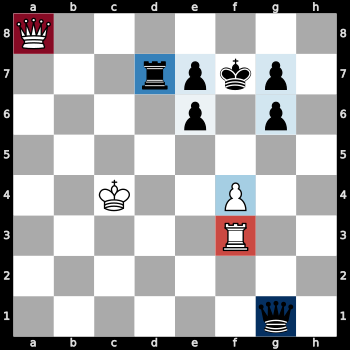

In [50]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [51]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Trapped rook

In [52]:
FILENAME = FOLDER / "trapped_rook"
FEN = "8/4k3/1p1p4/pr1Pp3/4P3/PP1K4/1R6/8 w - - 0 31"

True


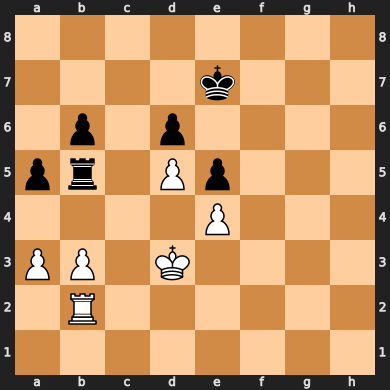

In [53]:
board = chess.Board(FEN)
print(board.turn)
board

In [54]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.975 0.025]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 17.4 s, sys: 768 ms, total: 18.1 s
Wall time: 6min 8s


.values =
array([[[ 0.56362034, -0.56362034],
        [ 0.17024228, -0.17024228],
        [ 0.0257811 , -0.0257811 ],
        [ 0.18351393, -0.18351393],
        [-0.09750595,  0.09750595],
        [-0.3238942 ,  0.3238942 ],
        [ 0.13579662, -0.13579662],
        [-0.06413898,  0.06413898],
        [-0.03427598,  0.03427598],
        [-0.08413914,  0.08413914]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

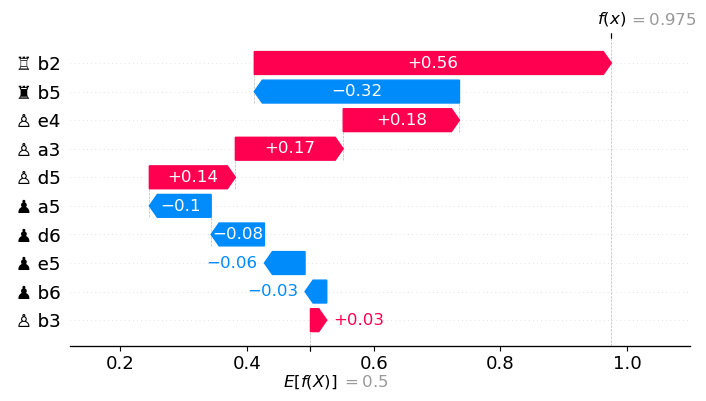

In [55]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


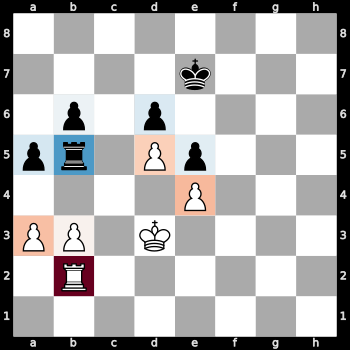

In [56]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [57]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Good rook vs bad bishop

In [58]:
FILENAME = FOLDER / "good_knight_bad_bishop"
FEN = "8/4B3/1K6/2Pknp2/4p1p1/4P1P1/8/8 b - - 0 133"

False


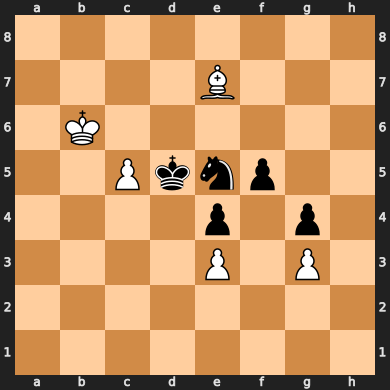

In [59]:
board = chess.Board(FEN)
print(board.turn)
board

In [60]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.113 0.887]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 16.5 s, sys: 701 ms, total: 17.2 s
Wall time: 5min 58s


.values =
array([[[ 0.10115726, -0.10115726],
        [ 0.10685123, -0.10685123],
        [-0.23842457,  0.23842457],
        [-0.25400736,  0.25400736],
        [ 0.25011012, -0.25011012],
        [-0.40351173,  0.40351173],
        [-0.22105391,  0.22105391],
        [ 0.27187897, -0.27187897]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1.]])

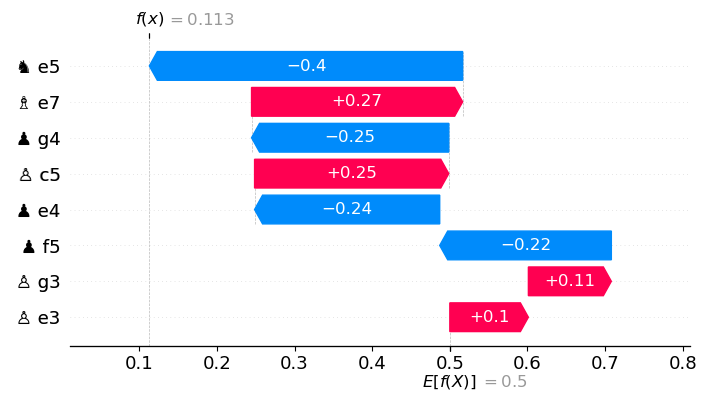

In [61]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


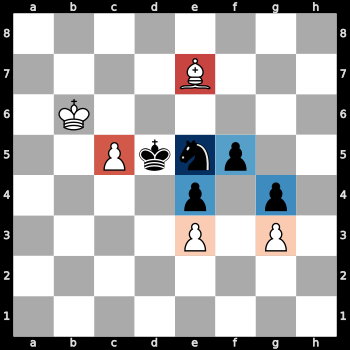

In [62]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [63]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Active king

In [ ]:
FILENAME = FOLDER / "active_king"
FEN = "2b1rrk1/2pR1p2/1pq1pQp1/p3P2p/P1PR1K1P/5N2/2P2PP1/8 w - - 6 34"

In [ ]:
board = chess.Board(FEN)
print(board.turn)
board

In [ ]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

In [ ]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


In [ ]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [ ]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Active king (another example) 
Denis Khismatullin (2653) vs. Pavel Eljanov (2727)
https://www.chess.com/article/view/the-craziest-king-moves-ever

In [41]:
FILENAME = FOLDER / "active_king_v2"
FEN = "5Q2/5p1p/1pPr2p1/6k1/8/3pP2P/2q2PP1/3R1K2 w - - 4 44"

True


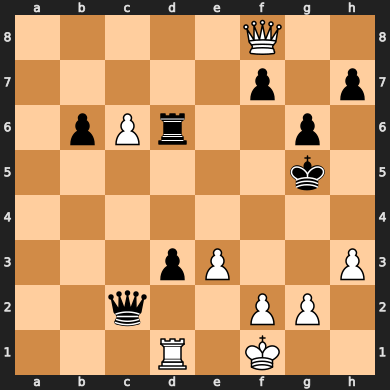

In [36]:
board = chess.Board(FEN)
print(board.turn)
board

In [37]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.543 0.457]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 22.9 s, sys: 1.04 s, total: 23.9 s
Wall time: 5min 54s


.values =
array([[[ 0.30457108, -0.30457108],
        [-0.44541479,  0.44541479],
        [ 0.07773803, -0.07773803],
        [ 0.02868213, -0.02868213],
        [-0.15242514,  0.15242514],
        [ 0.03656141, -0.03656141],
        [ 0.04894674, -0.04894674],
        [-0.03350126,  0.03350126],
        [ 0.16696425, -0.16696425],
        [-0.21830484,  0.21830484],
        [-0.08391721,  0.08391721],
        [-0.13576767,  0.13576767],
        [-0.06228627,  0.06228627],
        [ 0.51115355, -0.51115355]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

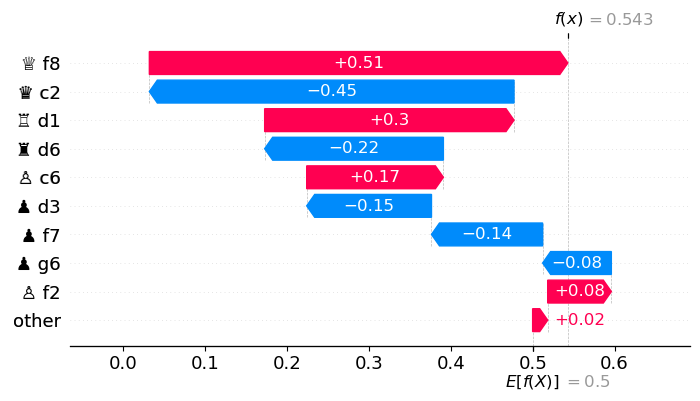

In [42]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


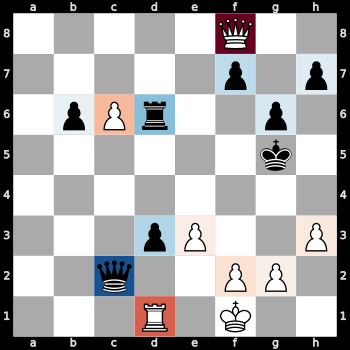

In [39]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [43]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Too many pieces

In [94]:
FILENAME = FOLDER / "too_many_pieces"

# Tactic 1

In [3]:
FILENAME = FOLDER / "tactic1"
# https://www.reddit.com/r/ChessPuzzles/comments/1lf799h/white_to_play_and_mate_in_2/
FEN = "rk2K3/NPR5/8/8/8/8/8/4Q3 w - - 0 1"

True


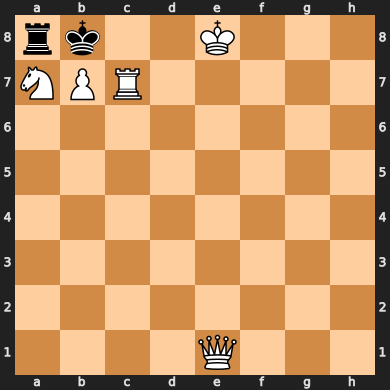

In [4]:
board = chess.Board(FEN)
print(board.turn)
board

In [5]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.999 0.001]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 45.5 s, sys: 1 s, total: 46.5 s
Wall time: 2min 48s


.values =
array([[[ 0.31096324, -0.31096324],
        [ 0.02102972, -0.02102972],
        [ 0.07077707, -0.07077707],
        [ 0.23637549, -0.23637549],
        [-0.14014553,  0.14014553]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1.]])

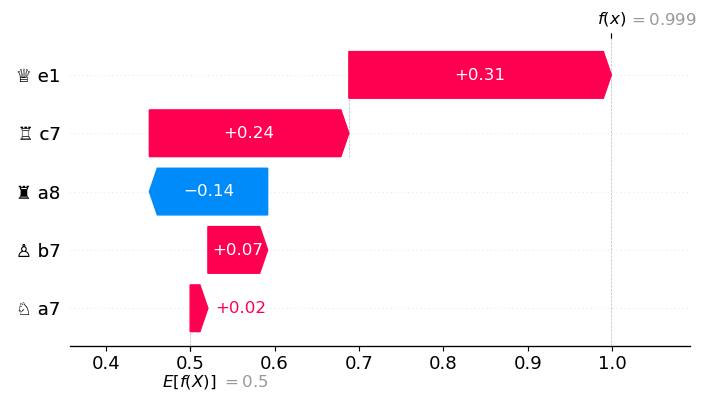

In [6]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


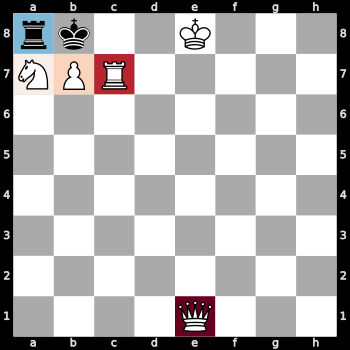

In [7]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [8]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Tactic 2

In [9]:
FILENAME = FOLDER / "tactic2"
# https://www.reddit.com/r/ChessPuzzles/comments/1i07ewq/saw_this_on_fb_white_to_play_mate_in_2/
FEN = "k7/rqQ3K1/8/8/8/5B2/8/8 w - - 0 1"

True


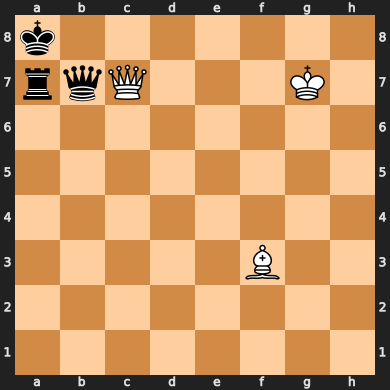

In [10]:
board = chess.Board(FEN)
print(board.turn)
board

In [11]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.999 0.001]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 35.3 s, sys: 821 ms, total: 36.2 s
Wall time: 3min 32s


.values =
array([[[ 0.41343853, -0.41343853],
        [-0.2712524 ,  0.2712524 ],
        [-0.22619839,  0.22619839],
        [ 0.58301225, -0.58301225]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1.]])

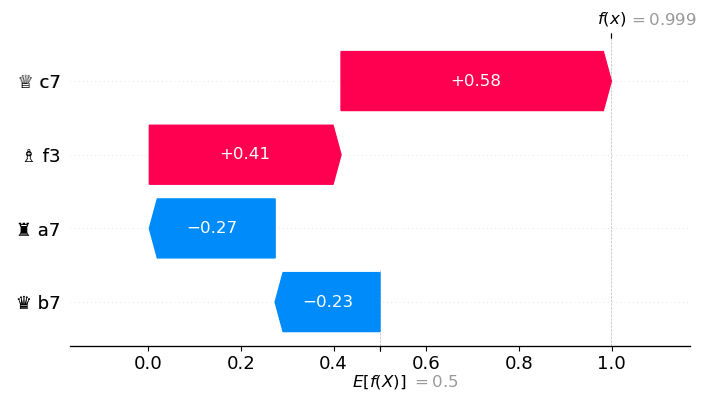

In [12]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


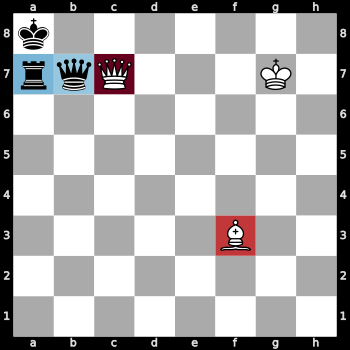

In [13]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [14]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

# Engines

In [15]:
FILENAME = FOLDER / "enginest_stock"
# https://www.youtube.com/watch?v=lFXJWPhDsSY 11.25
FEN = "5rkq/3prp1p/5RpP/p1p5/5Q2/1B4P1/P4PK1/8 w - - 0 1"

True


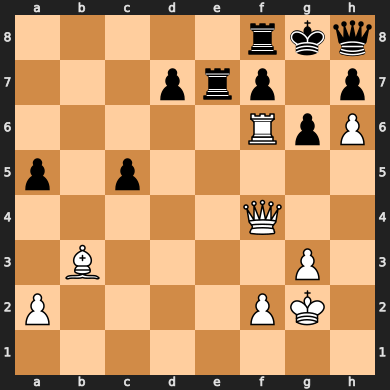

In [16]:
board = chess.Board(FEN)
print(board.turn)
board

In [17]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.906 0.094]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 24 s, sys: 1.09 s, total: 25.1 s
Wall time: 5min 14s


.values =
array([[[ 0.07920612, -0.07920612],
        [ 0.09276723, -0.09276723],
        [ 0.19168344, -0.19168344],
        [ 0.07162814, -0.07162814],
        [ 0.58012707, -0.58012707],
        [-0.10096268,  0.10096268],
        [-0.02550825,  0.02550825],
        [ 0.41155202, -0.41155202],
        [-0.10044115,  0.10044115],
        [ 0.13085034, -0.13085034],
        [-0.02242654,  0.02242654],
        [-0.24157859,  0.24157859],
        [-0.09399631,  0.09399631],
        [-0.05436588,  0.05436588],
        [-0.21694275,  0.21694275],
        [-0.29559221,  0.29559221]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

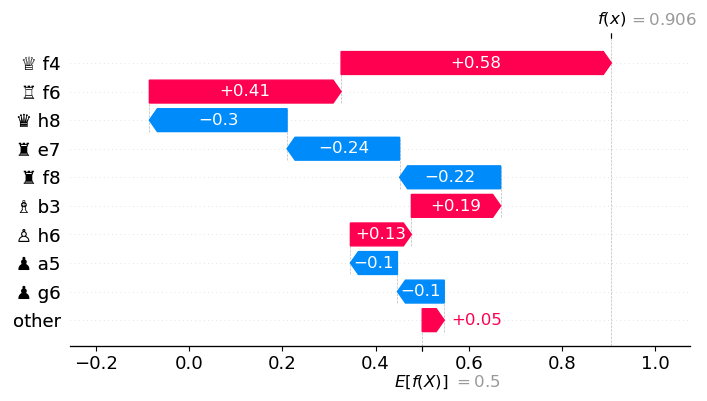

In [18]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


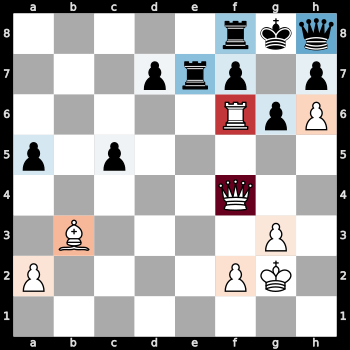

In [19]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [20]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)

In [3]:
FILENAME = FOLDER / "enginest_lc0"
# https://www.youtube.com/watch?v=lFXJWPhDsSY 11.25
# https://lichess.org/study/wxrovYNH/hBLBToEN
FEN = "5rkq/3prp1p/5RpP/p1p5/5Q2/1B4P1/P4PK1/8 w - - 0 1"

True


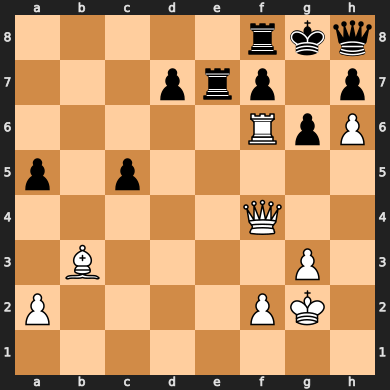

In [4]:
board = chess.Board(FEN)
print(board.turn)
board

In [5]:
%%time
engine = EngineWrapper(
    path="lc0",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.SamplingExplainer,
    nsamples=NSAMPLES,
)

print(chesshap.engine.base_score_)

chesshap.explain()

<UciProtocol (pid=90256)>: stderr >>        _
<UciProtocol (pid=90256)>: stderr >> |   _ | |
<UciProtocol (pid=90256)>: stderr >> |_ |_ |_| v0.31.2+git.dirty built Oct 20 2024
<UciProtocol (pid=90256)>: stderr >> Found pb network file: /opt/homebrew/Cellar/lc0/0.31.2/libexec/42850.pb.gz
<UciProtocol (pid=90256)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=90256)>: stderr >> Initialized metal backend on device Apple M1 Pro


[[0.671 0.329]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 2.48 s, sys: 271 ms, total: 2.75 s
Wall time: 2min 9s


.values =
array([[[ 0.052214  , -0.052214  ],
        [ 0.07545477, -0.07545477],
        [ 0.18898848, -0.18898848],
        [ 0.05513213, -0.05513213],
        [ 0.56249564, -0.56249564],
        [-0.10099708,  0.10099708],
        [-0.04203749,  0.04203749],
        [ 0.35422265, -0.35422265],
        [-0.08629853,  0.08629853],
        [ 0.10085343, -0.10085343],
        [-0.05603497,  0.05603497],
        [-0.23651786,  0.23651786],
        [-0.0712098 ,  0.0712098 ],
        [-0.02508815,  0.02508815],
        [-0.24929524,  0.24929524],
        [-0.35088197,  0.35088197]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

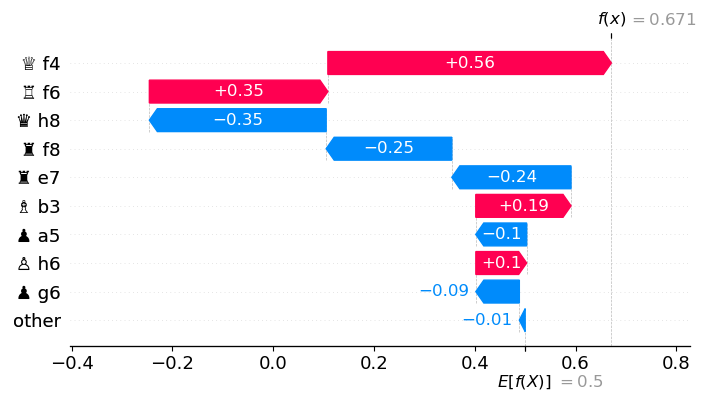

In [6]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


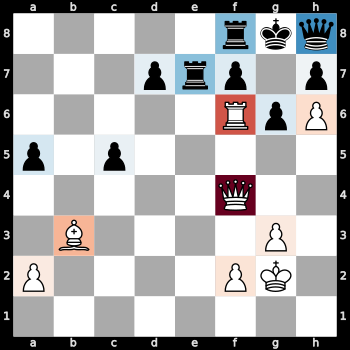

In [7]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [8]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)